##  Gaussian distribution :
Assume that the continuous values HEIGHT /WEIGHT are associated with each class are distributed according to the Gaussian distribution.  


# Load Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# EDA

In [2]:
gender_df=pd.read_csv("weight-height.csv")

In [3]:
gender_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
gender_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [12]:
male=gender_df[gender_df["Gender"]=="Male"]
female=gender_df[gender_df["Gender"]=="Female"]

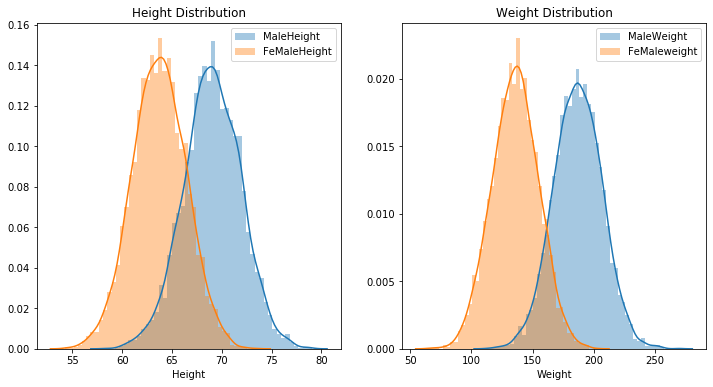

In [15]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

ax1=sns.distplot(male["Height"],ax=ax[0],label="MaleHeight")
ax1=sns.distplot(female["Height"],ax=ax[0],label="FeMaleHeight")
ax1.set_title("Height Distribution")
ax1.legend()

ax2=sns.distplot(male["Weight"],ax=ax[1],label="MaleWeight")
ax2=sns.distplot(female["Weight"],ax=ax[1],label="FeMaleweight")
ax2.set_title("Weight Distribution")
ax2.legend()

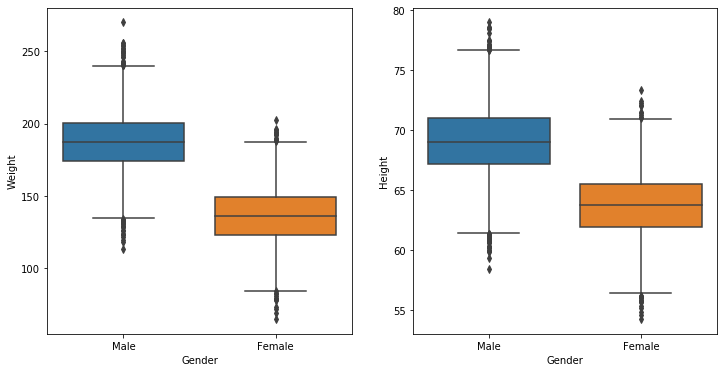

In [17]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax1=sns.boxplot(x="Gender",y="Weight",data=gender_df,ax=ax[0])
ax2=sns.boxplot(x="Gender",y="Height",data=gender_df,ax=ax[1])

# Train test split

In [18]:
from sklearn.model_selection import train_test_split
X=gender_df.drop(["Gender"],axis=1)
Y=gender_df["Gender"]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

# model building

In [20]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model=model.fit(X_train, y_train)

# Evaluate

In [21]:
 y_test_predictedlabel=model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
accuracy_score(y_test, y_test_predictedlabel)

0.882

In [23]:
confusion_matrix(y_test, y_test_predictedlabel)

array([[1328,  161],
       [ 193, 1318]], dtype=int64)

In [24]:
print(classification_report(y_test,y_test_predictedlabel))

              precision    recall  f1-score   support

      Female       0.87      0.89      0.88      1489
        Male       0.89      0.87      0.88      1511

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



# Prediction on unseen data 

In [25]:
model.predict([[55,99]])

array(['Female'], dtype='<U6')

In [26]:
model.predict([[80,240]])

array(['Male'], dtype='<U6')

In [27]:
model.predict([[65,150]])

array(['Female'], dtype='<U6')